# Gravity model, notes cited from professor Sobolevsky, NYU CUSP

### Results are shown at the end

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.formula.api as smf
from sklearn import linear_model
from pandas.stats.api import ols
import geopandas as gp
import operator
%pylab inline
import warnings
warnings.filterwarnings('ignore')
RootPath = '/Users/CQ/Documents/Project1'

Failed `CDLL(/Library/Frameworks/GEOS.framework/Versions/Current/GEOS)`


Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (20,9)

In [3]:
from GravModel import GravModel as GM

In [30]:
data1 = pd.read_csv(RootPath+'/GravModel/Overall/Net1/Net1Degree All days.csv', index_col=0)
fit_data1 = GM.KLBin_init(data1)
data2 = pd.read_csv(RootPath+'/GravModel/Overall/Net2/Net2Degree All days.csv', index_col=0)
fit_data2 = GM.KLBin_init(data2[data2.weight != 0])

In [17]:
y1 = log(fit_data1.weight)
X1 = fit_data1.iloc[:,5:]
result1 = ols(y=y1,x=X1)
OLSmatrix1 = result1.summary_as_matrix

In [31]:
y2 = log(fit_data2.weight)
X2 = fit_data2.iloc[:,5:]
result2 = ols(y=y2,x=X2)
OLSmatrix2 = result2.summary_as_matrix

## Since basically the numerical values of $ln(W^{out})$ and $ln(W^{in})$ are symmetrically the same, we only present the results regarding $ln(W^{out})$
## First, we select the terms with high p-values (> 0.05) to see if their coefficients are indeed very close to zero

In [10]:
HighPV1 = OLSmatrix1.loc['p-value',]
HighPV1[HighPV1 > 0.05]

K10039    0.650084
K10044    0.099672
K10470    0.172904
K11204    0.402322
K11212    0.249908
K11358    0.621680
K11413    0.151276
K11429    0.849435
K11694    0.489093
L10039    0.650084
L10044    0.099672
L10470    0.172904
L11204    0.402322
L11212    0.249908
L11358    0.621680
L11413    0.151276
L11429    0.849435
L11694    0.489093
bin39     0.308730
bin40     0.170027
bin41     0.273375
bin43     0.215251
bin44     0.072605
bin49     0.168103
Name: p-value, dtype: float64

In [32]:
HighPV2 = OLSmatrix2.loc['p-value',]
HighPV2[HighPV2 > 0.05]

K10304    0.258892
K10307    0.107462
K10310    0.450710
K11203    0.075953
K11212    0.123097
K11219    0.365059
K11228    0.743706
K11360    0.468624
K11366    0.739753
K11369    0.143759
K11413    0.223414
K11415    0.606938
K11418    0.406569
K11422    0.133234
K11693    0.073619
L10304    0.258892
L10307    0.107462
L10310    0.450710
L11203    0.075953
L11212    0.123097
L11219    0.365059
L11228    0.743706
L11360    0.468624
L11366    0.739753
L11369    0.143759
L11413    0.223414
L11415    0.606938
L11418    0.406569
L11422    0.133234
L11693    0.073619
bin31     0.144317
bin33     0.281346
bin34     0.628864
bin35     0.056293
bin36     0.134046
bin38     0.243670
bin39     0.353534
bin43     0.786685
Name: p-value, dtype: float64

In [33]:
CheckZip1 = [10039,10044,10470,11204,11212,11358,11413,11429,11694]
CheckBin1 = [39,40,41,43,44,49]
CheckZip2 = [10304,10307,10310,11203,11212,11219,11228,11360,11366,11369,11413,11415,11418,11422,11693]
CheckBin2 = [31,33,34,35,36,38,39,43]

([<matplotlib.axis.YTick at 0x150d06d10>,
 <a list of 10 Text yticklabel objects>)

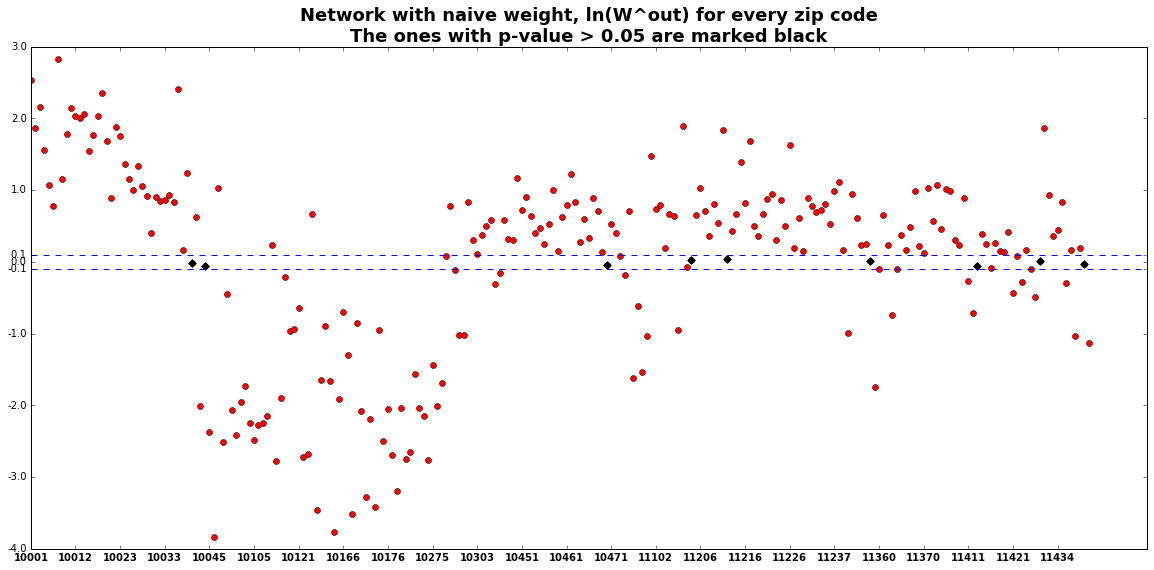

In [38]:
W_out1 = [(i,OLSmatrix1.loc['beta','K%d'%i]) for i in GM.PLACES]
DF_Wout1 = pd.DataFrame(W_out1, columns=['ZipCode', 'Out_degree'])
Highlight_Wout1 = [list(DF_Wout1.ZipCode).index(i) for i in CheckZip1]

plt.plot(range(len(DF_Wout1)), DF_Wout1.Out_degree, 'or')
plt.plot(Highlight_Wout1, DF_Wout1.loc[Highlight_Wout1,'Out_degree'], 'Dk', markersize=5)
plt.axhline(-.1, ls = '--')
plt.axhline(.1, ls = '--')
yticks = sort([-.1,.1]+list(np.arange(-4,4)))
plt.title("Network with naive weight, ln(W^out) for every zip code\nThe ones with p-value > 0.05 are marked black",
          fontweight = 'bold', size = 18)
plt.xticks(np.arange(0,240,step=10), DF_Wout1.ZipCode[np.arange(0,240, step=10)], fontweight = 'bold', size = 10)
plt.yticks(yticks,yticks, size = 10)

([<matplotlib.axis.YTick at 0x14cc6fcd0>,
 <a list of 10 Text yticklabel objects>)

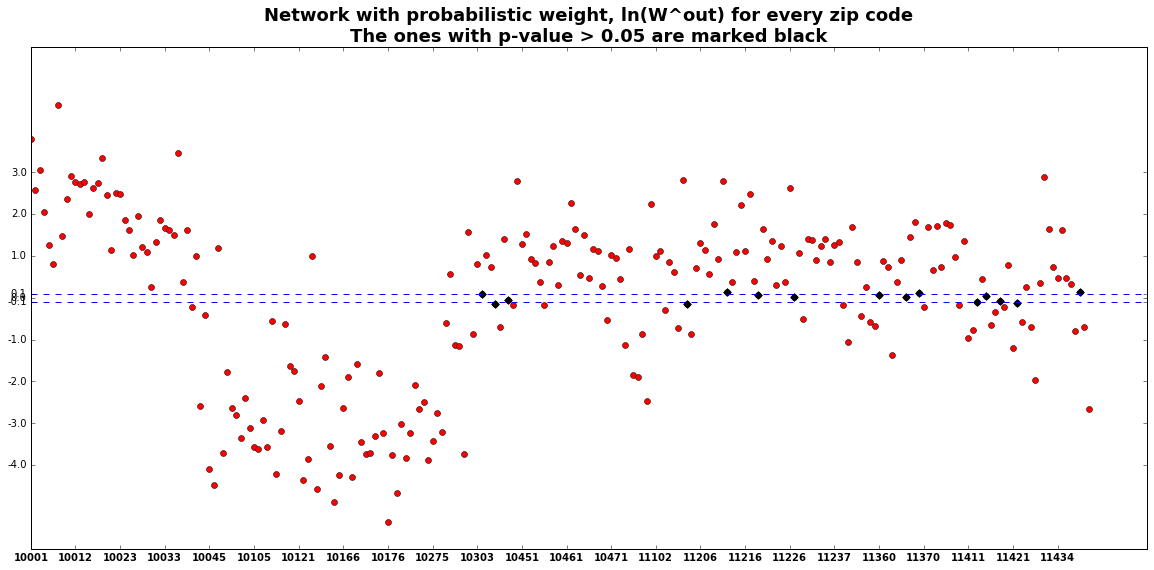

In [37]:
W_out2 = [(i,OLSmatrix2.loc['beta','K%d'%i]) for i in GM.PLACES]
DF_Wout2 = pd.DataFrame(W_out2, columns=['ZipCode', 'Out_degree'])
Highlight_Wout2 = [list(DF_Wout2.ZipCode).index(i) for i in CheckZip2]

plt.plot(range(len(DF_Wout2)), DF_Wout2.Out_degree, 'or')
plt.plot(Highlight_Wout2, DF_Wout2.loc[Highlight_Wout2,'Out_degree'], 'Dk', markersize=5)
plt.axhline(-.1, ls = '--')
plt.axhline(.1, ls = '--')
yticks = sort([-.1,.1]+list(np.arange(-4,4)))
plt.title("Network with probabilistic weight, ln(W^out) for every zip code\nThe ones with p-value > 0.05 are marked black",
          fontweight = 'bold', size = 18)
plt.xticks(np.arange(0,240,step=10), DF_Wout2.ZipCode[np.arange(0,240, step=10)], fontweight = 'bold', size = 10)
plt.yticks(yticks,yticks, size = 10)

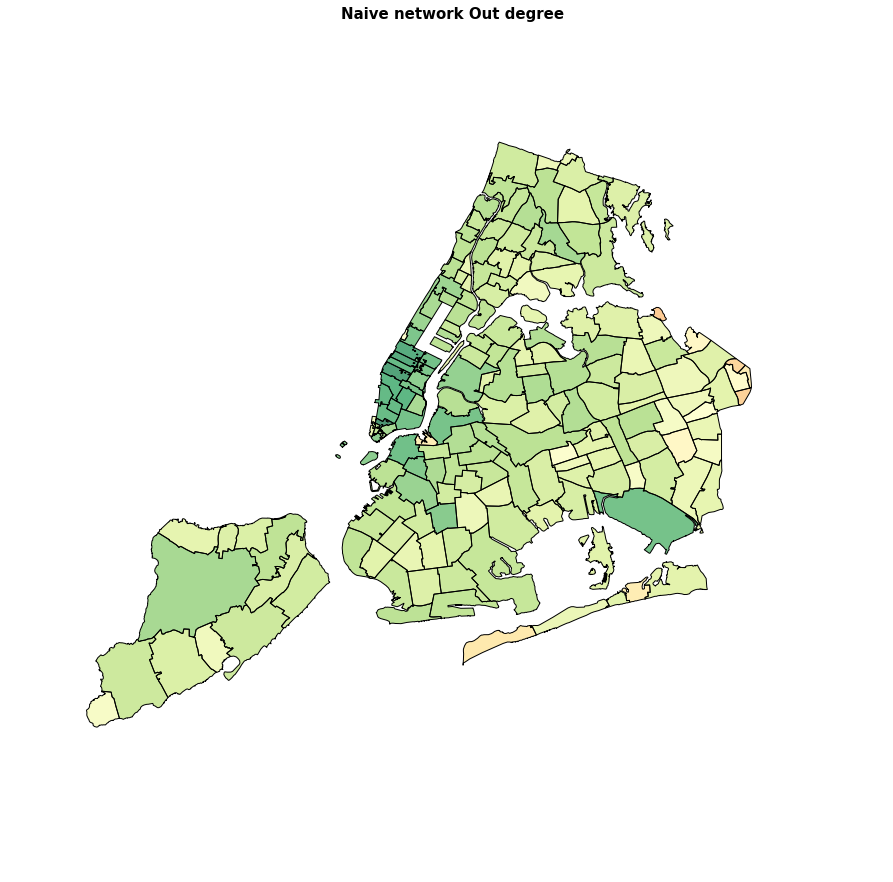

In [39]:
fig1 = plt.figure(figsize=(15,15))
GM.PlotMapPart(fig1, W_out1, title = 'Naive network Out degree', size = 111)

## We draw a heatmap of with the idea of "darker color indicates higher value ($ln(W^{out})$)"

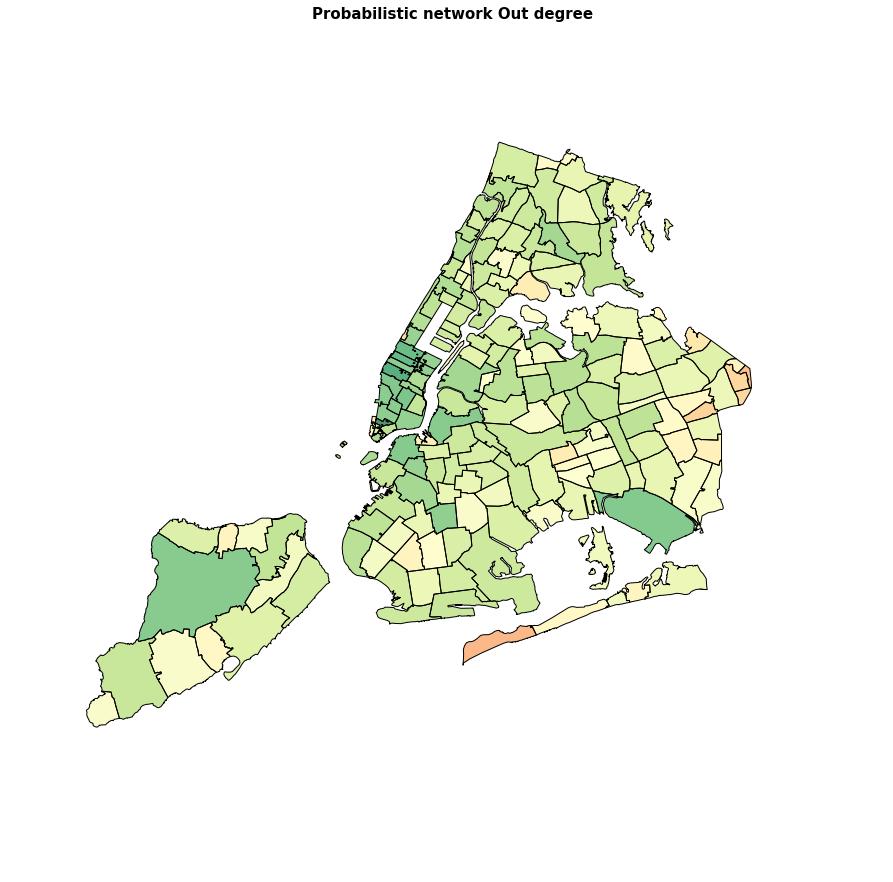

In [40]:
fig2 = plt.figure(figsize=(15,15))
GM.PlotMapPart(fig2, W_out2, title = 'Probabilistic network Out degree', size = 111)

## Next we present the $ln(f(distance))$ with respect to the average distance within each bin, where the bins are determined by the percentile of distribution of all distance data in NYC

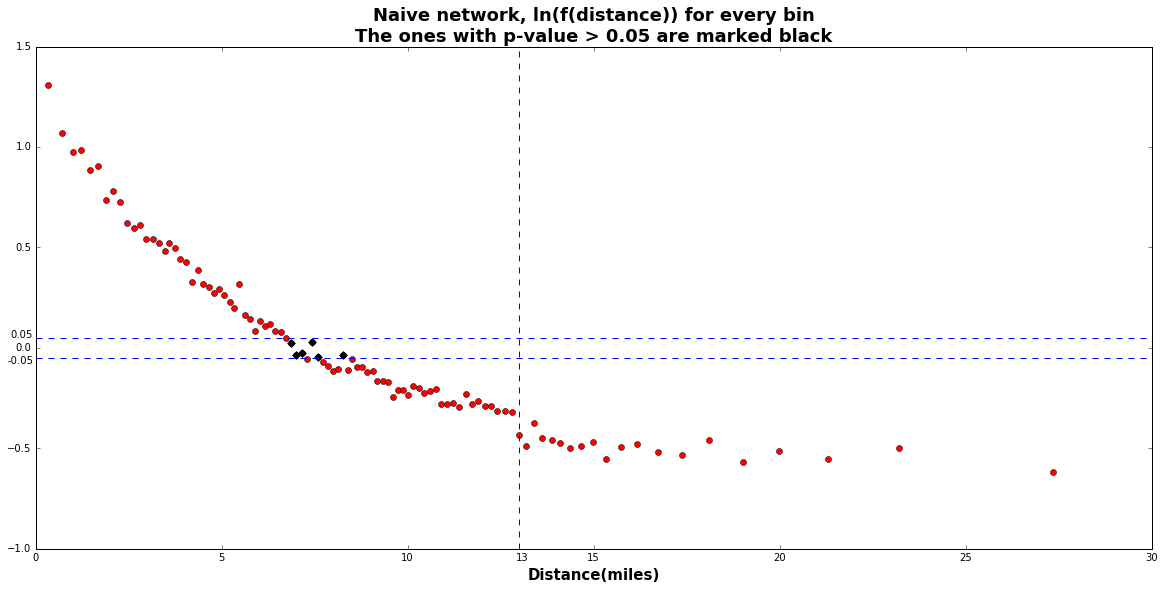

In [52]:
F_Dist1 = [(i,OLSmatrix1.loc['beta','bin%d'%i]) for i in range(100)]
#Calculate the average distance within each bin
DistMean1 = [fit_data1[fit_data1.DistRank == i].distance.mean() for i in range(100)]
F_Dist1 = pd.DataFrame(F_Dist1, columns=['DistRank', 'f_Dist'])
Highlight_Dist1 = [DistMean1[i] for i in CheckBin1]

plt.plot(DistMean1, F_Dist1.f_Dist, 'or')
plt.plot(Highlight_Dist1, F_Dist1.loc[CheckBin1,'f_Dist'], 'Dk')
plt.axhline(-.05, ls = '--')
plt.axhline(.05, ls = '--')
plt.axvline(13, ls = '--')
plt.text(12.9,-1.06,'13')
plt.text(-0.75,-0.08,'-0.05')
plt.text(-0.68,0.05,'0.05')
yticks = sort([-.05,.05]+list(np.arange(-1,2,0.5)))
plt.title("Naive network, ln(f(distance)) for every bin\nThe ones with p-value > 0.05 are marked black", fontweight = 'bold', size = 18)
#plt.yticks(yticks,yticks, size = 10)
plt.xlabel('Distance(miles)', fontweight = 'bold', size = 15)

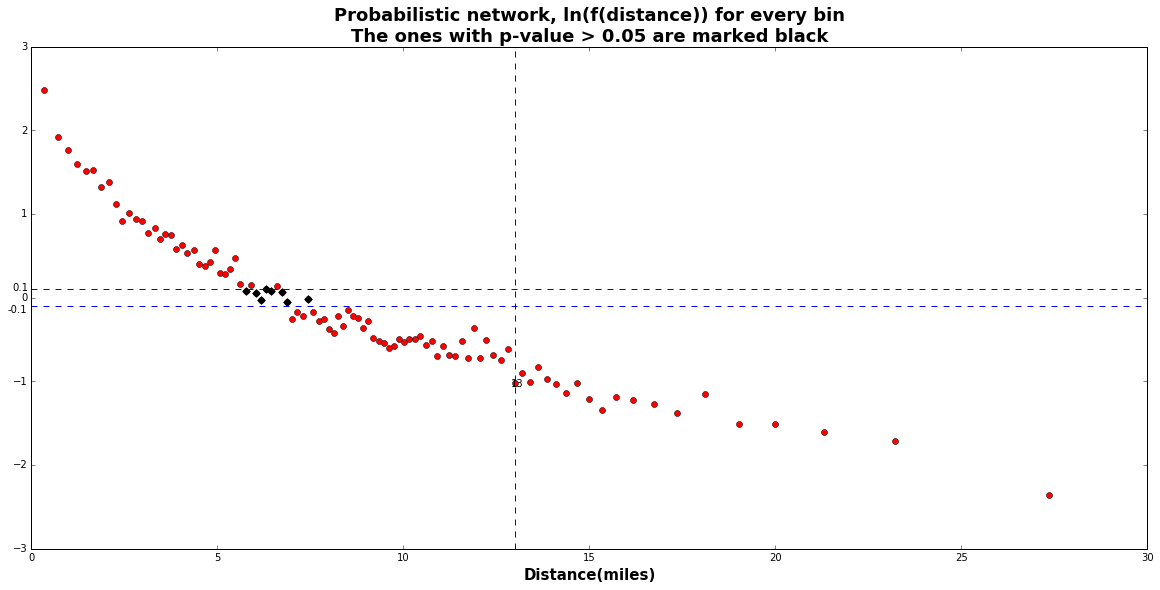

In [53]:
F_Dist2 = [(i,OLSmatrix2.loc['beta','bin%d'%i]) for i in range(100)]
#Calculate the average distance within each bin
DistMean2 = [fit_data2[fit_data2.DistRank == i].distance.mean() for i in range(100)]
F_Dist2 = pd.DataFrame(F_Dist2, columns=['DistRank', 'f_Dist'])
Highlight_Dist2 = [DistMean2[i] for i in CheckBin2]

plt.plot(DistMean2, F_Dist2.f_Dist, 'or')
plt.plot(Highlight_Dist2, F_Dist2.loc[CheckBin2,'f_Dist'], 'Dk')
plt.axhline(-.1, ls = '--')
plt.axhline(.1, ls = '--')
plt.axvline(13, ls = '--')
plt.text(12.9,-1.06,'13')
plt.text(-0.65,-0.18,'-0.1')
plt.text(-0.5,0.08,'0.1')
yticks = sort([-.05,.05]+list(np.arange(-1,2,0.5)))
plt.title("Probabilistic network, ln(f(distance)) for every bin\nThe ones with p-value > 0.05 are marked black", fontweight = 'bold', size = 18)
#plt.yticks(yticks,yticks, size = 10)
plt.xlabel('Distance(miles)', fontweight = 'bold', size = 15)

# Since both networks looks quite similar to each other, from now on we narrow our investigation to naive network only, the probabilistic counterparts can be done the same way.

## It appears that the $ln(f(distance))$ does look like a logarithm function (with negative sign of course), and we exponentiate it to see if there's a linear trend
### For better approximation effect, we leave out the last ten points as outliers as we believe that once the distance has passed a certain "threshold", the impact of it will becomo irrelavant, and we will use "13 miles" as this threshold judging by the plot (which, currently, covers 80% of the all distance data in NYC)

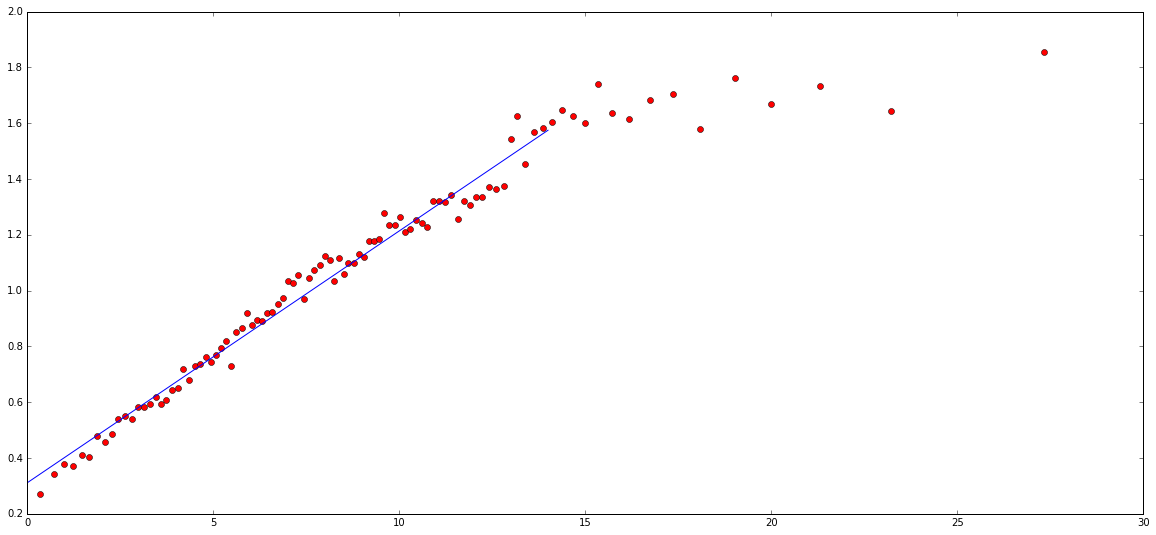

In [54]:
plt.plot(DistMean1, 1.0/exp(F_Dist1.f_Dist), 'or')
Dist_OLS1 = ols(y = 1.0/exp(F_Dist1.f_Dist)[:-20], x = pd.DataFrame(DistMean1[:-20]))
(a,b) = Dist_OLS1.summary_as_matrix.loc['beta']
plt.plot(range(15), [a*i+b for i in range(15)], '-b')

In [55]:
print('f(distance))^(-1) ~ %f * distance + %f'%(a,b))

f(distance))^(-1) ~ 0.090262 * distance + 0.311104


## In other words, we find that the distance function looks like
## $$ f(dist) \sim \frac {1}{0.090262 \cdot dist + 0.311104}$$
## In other words
## $$ln(f(dist)) \sim -ln(0.090262 \cdot dist + 0.311104)$$
## So we add this "actual" function on the plot of $ln(f(dist))$:

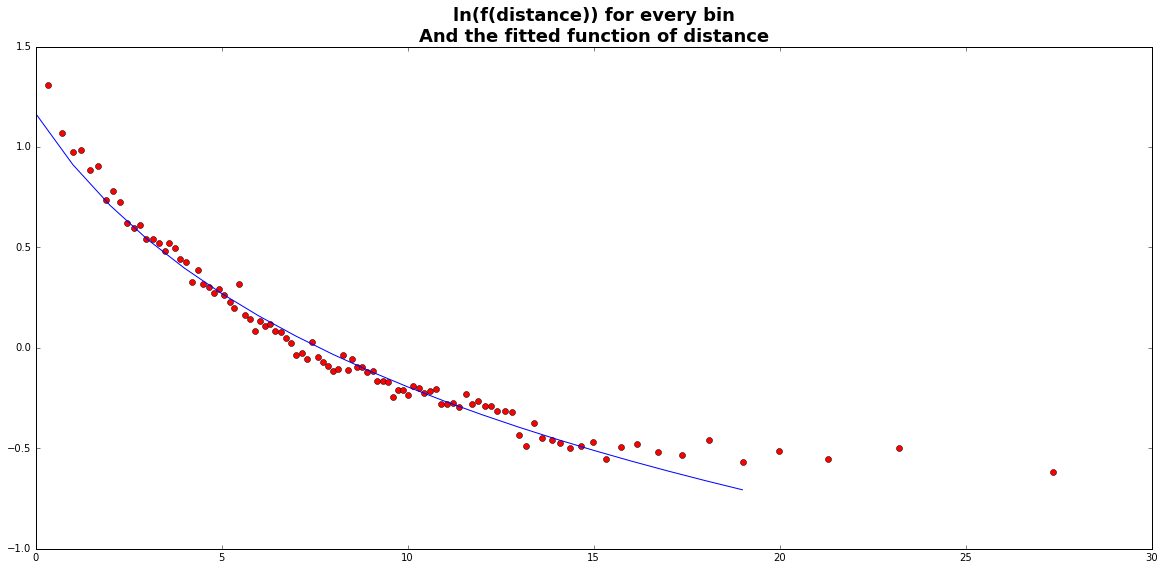

In [56]:
plt.plot(DistMean1, F_Dist1.f_Dist, 'or')
plt.title("ln(f(distance)) for every bin\nAnd the fitted function of distance", fontweight = 'bold', size = 18)
plt.plot(range(20),[-log(a*i+b) for i in range(20)])